In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split

In [2]:
#Loading dataset
data=pd.read_csv("Tourism.csv")

**View the first 5 rows of the dataset.**

In [3]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


**Check data types and number of non-null values for each column.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   TypeofContact            4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

- There are total of 20 columns and 4888 rows in the dataset.
- There are some null values as I further confirm them using `isna()` method below.
- Columns' data type is either integer, float or object.
- I will first take care of missing values, and then the object data types.**

In [5]:
data.isna().sum()

CustomerID                   0
ProdTaken                    0
Age                        226
TypeofContact               25
CityTier                     0
DurationOfPitch            251
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
NumberOfFollowups           45
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips              140
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisited     66
Designation                  0
MonthlyIncome              233
dtype: int64

**Summary of the dataset**

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisited,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [7]:
#Dropping two columns from the dataframe
data.drop(columns=['CustomerID'], inplace=True)

- We can drop 'CustomerID' column as it is an ID variable and will not add any value to the model.
- We are not given detailed information on the Welness Tourism Package if it includes an international trip. However, regardless of the type of the tourism package, I do not think that 'Passport' data is necessary for our model as it may not be a significant factor affecting the customers' decision if the package does not cover international trip. Since I do not know much about the trip and the passport data are given to us by default, I will keep it in the dataset.

In [8]:
data.nunique() # Number of unique values in each column

ProdTaken                     2
Age                          44
TypeofContact                 2
CityTier                      3
DurationOfPitch              34
Occupation                    4
Gender                        3
NumberOfPersonVisited         5
NumberOfFollowups             6
ProductPitched                5
PreferredPropertyStar         3
MaritalStatus                 4
NumberOfTrips                12
Passport                      2
PitchSatisfactionScore        5
OwnCar                        2
NumberOfChildrenVisited       4
Designation                   5
MonthlyIncome              2475
dtype: int64

**Analysis of Null Observations**

- Age: There are 226 null observations. It will be appropriate to replace missing observations with either mean or median Age value in the dataset. They are close to each other but in order to make a decision, I would first prefer doing univariate analysis.
- Type of Contact: There are only 251 null observations. It has 2 unique values. The value-counts results below show that Self Enquiry contact is twice much more than Company Invited contact. Therefore, TypeOfContact missing observatios are replaced with mode value.
- Duration of Pitch: There are only 25 null observations. It will be appropriate to replace missing observations with either mean or median Duration of Pitch value in the dataset. In order to make a decision, I would first prefer doing univariate analysis.
- Number of Followups: There are only 45 null observations. Minimum value given in the dataset is 1. It is plausible to assume that these missing followup data are likely to be zero meaning that there is no follow up for those customers.
- Preferred Property Star:There are only 26 null observations. Data stats shows that standard deviation of the data is low, so missing observations can be replaced with mean, median, or mode. It is good to review the univariate analysis before making a decision.
- Number of Trips: There are 140 null observations. Max. number of trips is 22 while the minimum is 1. The difference is significant. Instead of mean, median seems to be appropriate to replace the missing observations. Again, we need to review the univariate analysis.
- Number of Children Visited: There are 66 null observations. I believe that Median or Mode is the most appropriate replacement value for missing observations as the data 'Number of Childrend Visited' is not a continues variable.
- Monthly Income: There are 233 null observations. Means and median are close to each other. Either one of them can be replaced with the missing observations.

In [9]:
print(data['TypeofContact'].value_counts())

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64


In [10]:
#**Checking value counts of all object type columns**
for i in list(data.columns[data.dtypes=='object']):   
    print(data[i].value_counts())
    print('-'*30)

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
------------------------------
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
------------------------------
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
------------------------------
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
------------------------------
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
------------------------------
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64
------------------------------


- Variables with object datatype should be converted to categorical variables.
- CityTier is not an object datatype, but should be considered and treated as categorical variable; Tier 1, 2 & 3.
- See the conversions to categorical variables after handling the missing observations in the dataset. 

### Univariate analysis

In [11]:
# Along with univariate analysis, I want to examine the central tendency and dispersion of feature variables.
# It will help me how to deal with the missing observations as well.

# The following code returns the boxplots and histograms for the feature variables.


def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """  
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2,                  # Number of rows of the subplot grid= 2
                                           sharex = True,              # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           )                           # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet')   # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--')  # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='red', linestyle='solid') # Add median to the histogram

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4888.0,0.188216,0.390925,0.0,0.0,0.0,0.0,1.0
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
NumberOfPersonVisited,4888.0,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.0,3.0,4.0,5.0


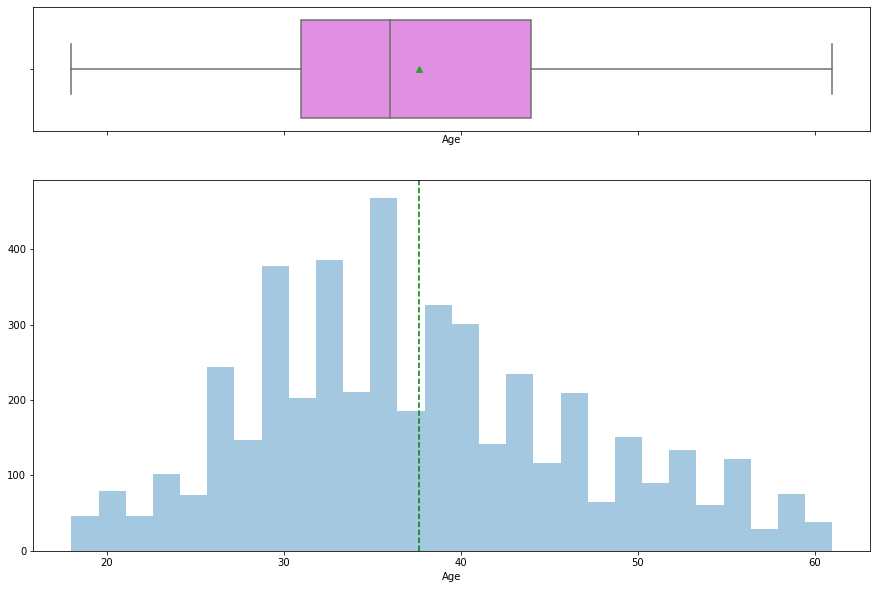

In [13]:
histogram_boxplot(data['Age'])

- Age has an almost symmetric distribution with a mean of 37.6 and a median of 36.
- As evident from the boxplot, there are no outliers in the distribution.
- Missing values can be replaced by median. 

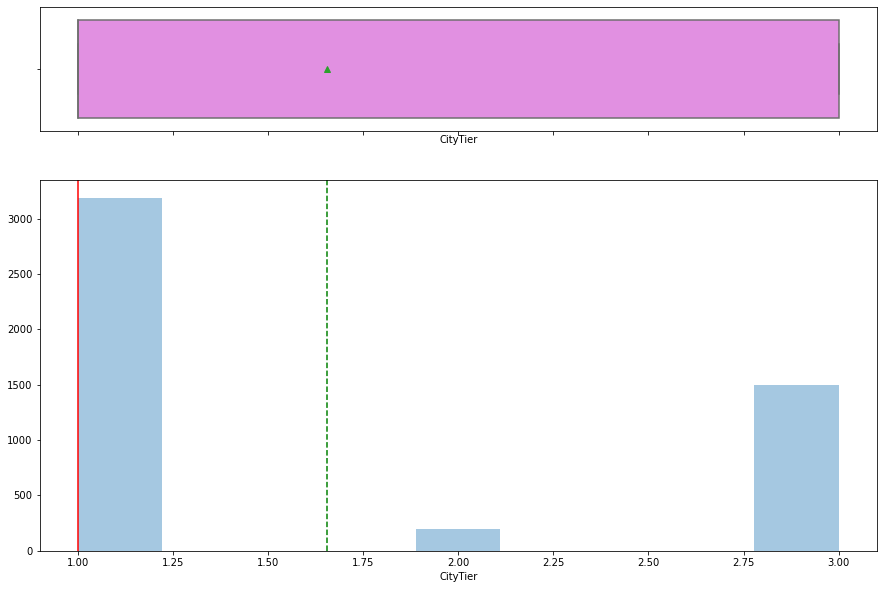

In [14]:
histogram_boxplot(data['CityTier'])

-As it is seen here, CityTier is a categorical variable and is treated below accordingly.

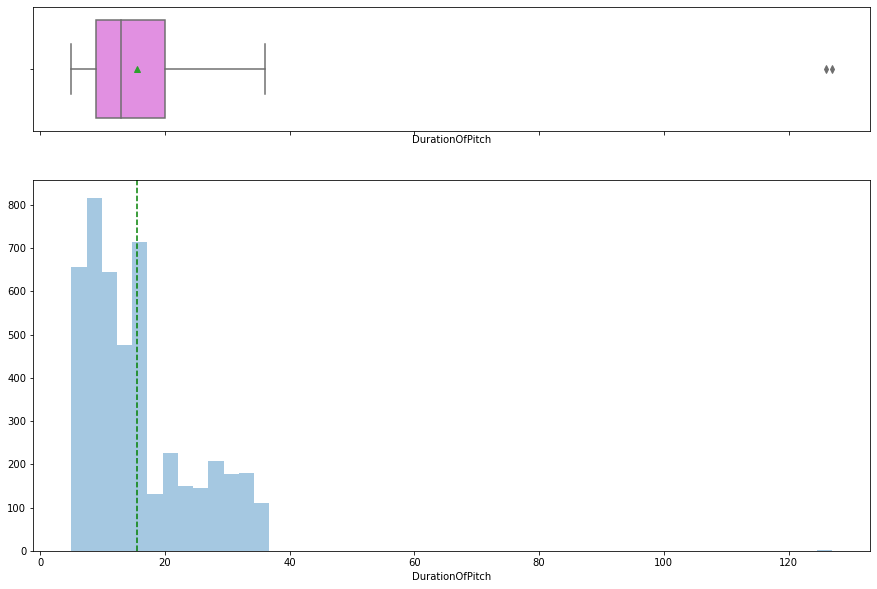

In [15]:
histogram_boxplot(data['DurationOfPitch'])

- DurationOfPitch doesn't have a symmetric distribution. 
- There are outliers in the distribution as evident from the boxplot 
- Because of the aferomentioned reasons, the missing observations are replaced with the median value.

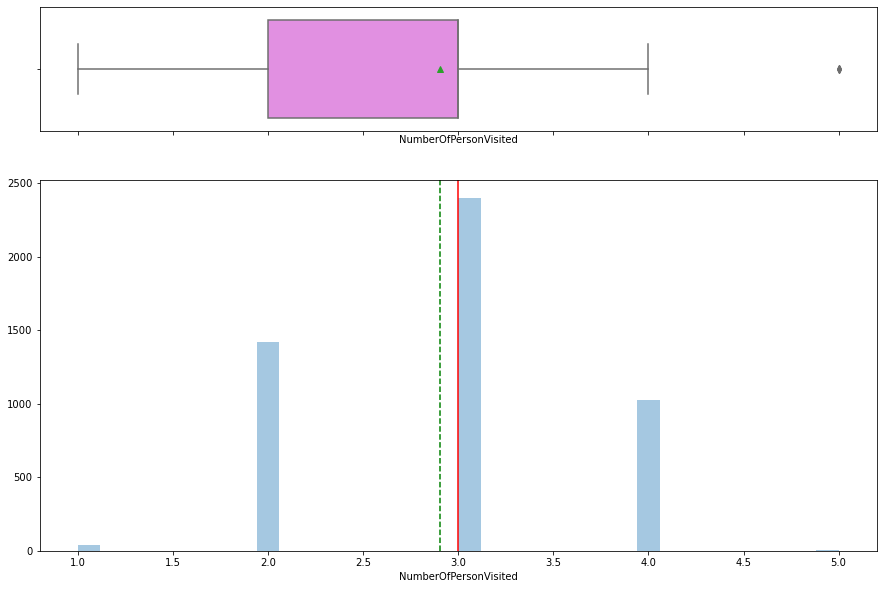

In [16]:
histogram_boxplot(data['NumberOfPersonVisited'])

- NumberOfPersonVisited has a symmetric distribution with a mean of 2.9 and a median of 3.

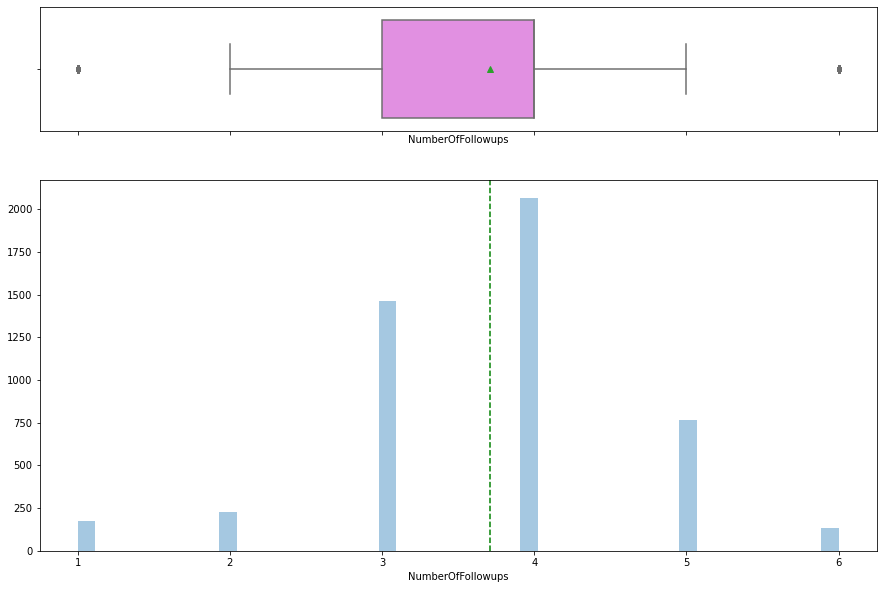

In [17]:
histogram_boxplot(data['NumberOfFollowups'])

- NumberOfFollowups has almost symmetric distribution as well. 
- There are couple of outliers in the data.
- Although mean and median values are very close to each other, 3.7 and 4 respectively, I would not prefer to use mean value for the missing observations as NumberOfFollowups is not a continues variable.
- Minimum value given for NumberOfFollowups is 1. It is plausible to assume that the missing followup data are likely to be zero meaning that there is no follow up for those customers.
- Becasue of the aferomentioned reasons, the missing observation is replaced by zero.

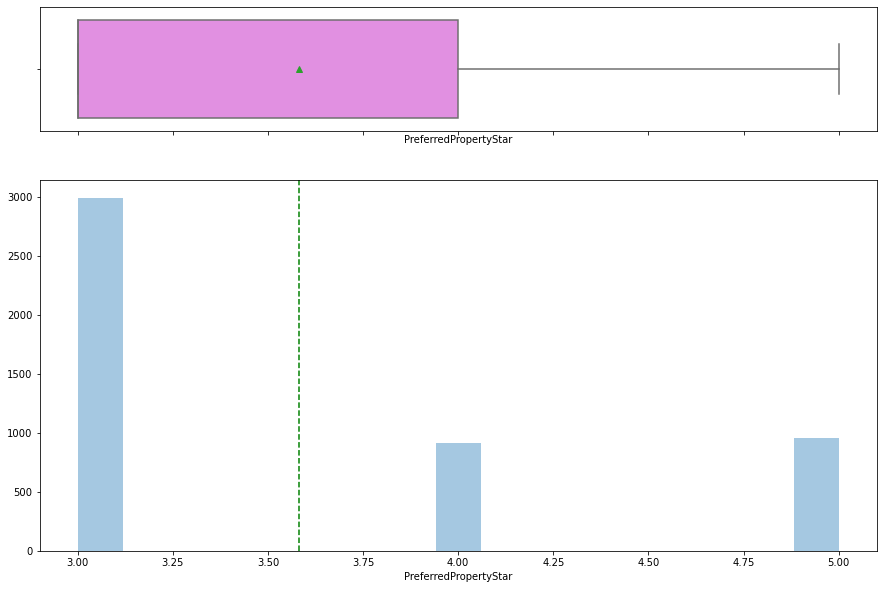

In [18]:
histogram_boxplot(data['PreferredPropertyStar'])

In [19]:
print(data['PreferredPropertyStar'].value_counts())

3.0    2993
5.0     956
4.0     913
Name: PreferredPropertyStar, dtype: int64


- PreferredPropertyStar's distribution is skewed to the right.
- Majority of observations has 3 stars. Per value-counts below, median and mode will be equal to each other which is 3.
- So the missing observations are replaced with 3.

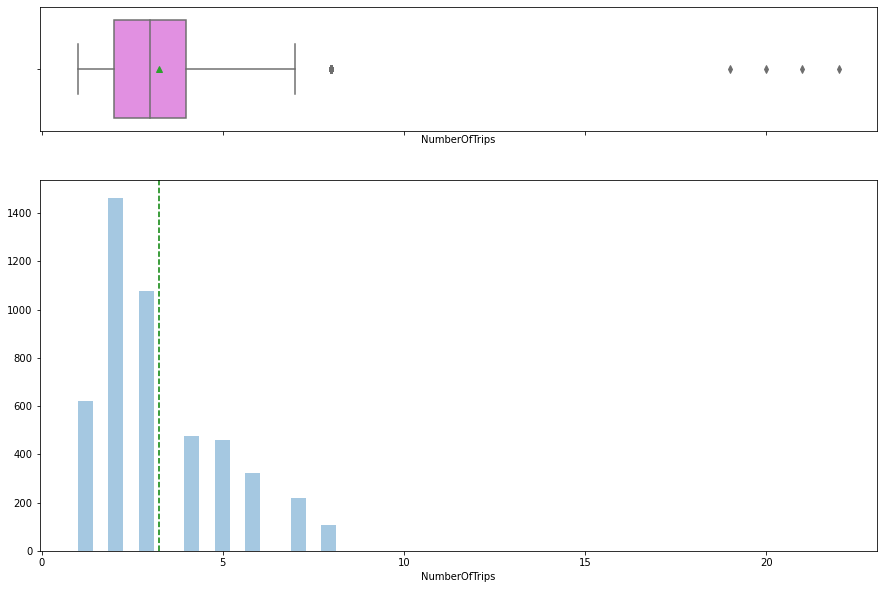

In [20]:
histogram_boxplot(data['NumberOfTrips'])

In [21]:
print(data['NumberOfTrips'].value_counts())

2.0     1464
3.0     1079
1.0      620
4.0      478
5.0      458
6.0      322
7.0      218
8.0      105
21.0       1
19.0       1
22.0       1
20.0       1
Name: NumberOfTrips, dtype: int64


- NumberOfTrip's distribution is skewed to the right.
- There are some outliers in the dataset.
- It is better to use median value to replace the missing observations.

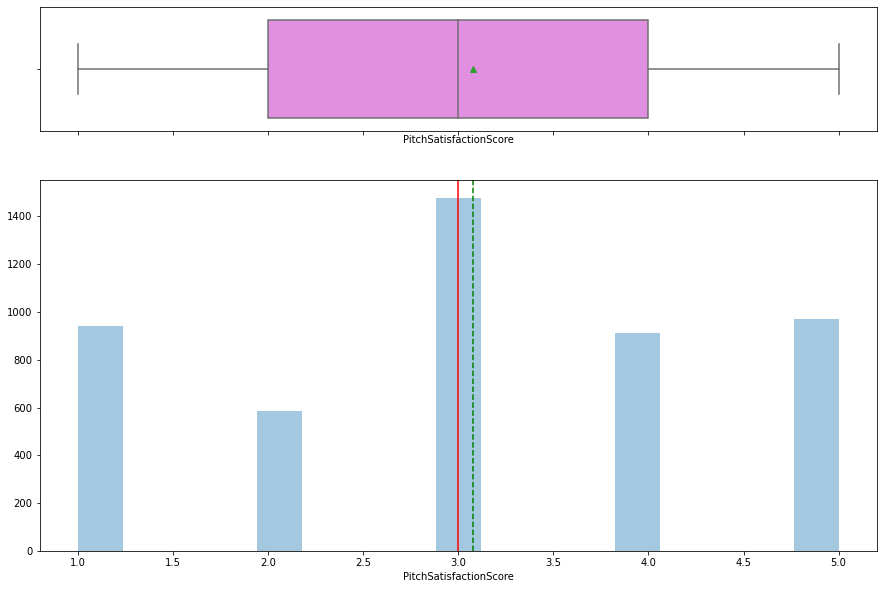

In [22]:
histogram_boxplot(data['PitchSatisfactionScore'])

- PitchSatisfactionScore is of very close to symmetrical distrubution.
- There are no outliers.

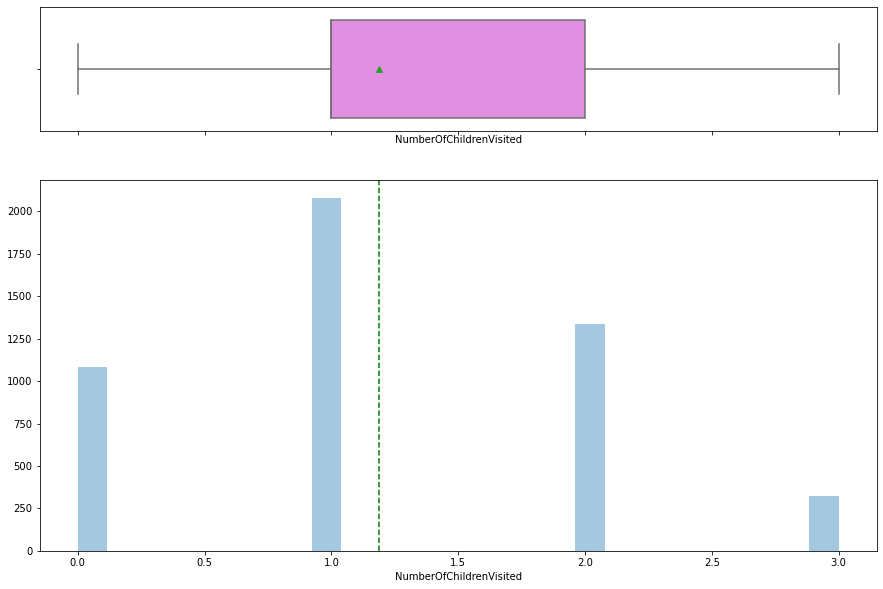

In [23]:
histogram_boxplot(data['NumberOfChildrenVisited'])

In [24]:
print(data['NumberOfChildrenVisited'].value_counts())

1.0    2080
2.0    1335
0.0    1082
3.0     325
Name: NumberOfChildrenVisited, dtype: int64


- NumberOfChildrenVisited is slightly skewed to the right.
- There is no outliers in the dataset.
- It is appropriate to use median value to replace the missing observations.

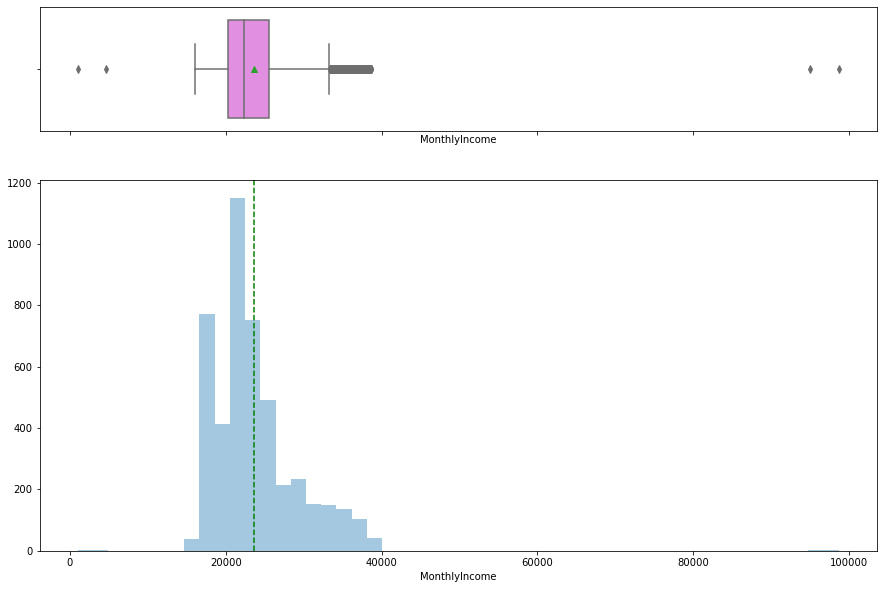

In [25]:
histogram_boxplot(data['MonthlyIncome'])

- MonthlyIncome is highly skewed to the right.
- There are high number of outliers.
- Therefore, median value can be used for replacing the missing observations.

## Replacing the Missing Values

Summary
- Variable: replaced with...
- Age: Median 
- TypeofContact: Mode
- DurationOfPitch: Median           
- NumberOfFollowups: Zero (0)
- PreferredPropertyStar: Median  
- NumberOfTrips: Median              
- NumberOfChildrenVisited: Median
- MonthlyIncome: Median          

In [26]:
data.median()

ProdTaken                      0.0
Age                           36.0
CityTier                       1.0
DurationOfPitch               13.0
NumberOfPersonVisited          3.0
NumberOfFollowups              4.0
PreferredPropertyStar          3.0
NumberOfTrips                  3.0
Passport                       0.0
PitchSatisfactionScore         3.0
OwnCar                         1.0
NumberOfChildrenVisited        1.0
MonthlyIncome              22347.0
dtype: float64

In [27]:
data.mean()

ProdTaken                      0.188216
Age                           37.622265
CityTier                       1.654255
DurationOfPitch               15.490835
NumberOfPersonVisited          2.905074
NumberOfFollowups              3.708445
PreferredPropertyStar          3.581037
NumberOfTrips                  3.236521
Passport                       0.290917
PitchSatisfactionScore         3.078151
OwnCar                         0.620295
NumberOfChildrenVisited        1.187267
MonthlyIncome              23619.853491
dtype: float64

In [28]:
data.mode()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,0.0,35.0,Self Enquiry,1.0,9.0,Salaried,Male,3.0,4.0,Basic,3.0,Married,2.0,0.0,3.0,1.0,1.0,Executive,17342.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20855.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21020.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21288.0


In [29]:
#Replacing Null Values

data['Age'].fillna(36,inplace=True)

data['TypeofContact'].fillna('Self Enquiry',inplace=True) #replacing with mode

data['DurationOfPitch'].fillna(9,inplace=True) #replacing with median

data['NumberOfFollowups'].fillna(0,inplace=True) #replacing with zero

data['PreferredPropertyStar'].fillna(3,inplace=True) #replacing with median

data['NumberOfTrips'].fillna(3,inplace=True) #replacing with median

data['NumberOfChildrenVisited'].fillna(1,inplace=True) #replacing with median

data['MonthlyIncome'].fillna(22347,inplace=True) #replacing with median

In [30]:
data.isna().sum()

ProdTaken                  0
Age                        0
TypeofContact              0
CityTier                   0
DurationOfPitch            0
Occupation                 0
Gender                     0
NumberOfPersonVisited      0
NumberOfFollowups          0
ProductPitched             0
PreferredPropertyStar      0
MaritalStatus              0
NumberOfTrips              0
Passport                   0
PitchSatisfactionScore     0
OwnCar                     0
NumberOfChildrenVisited    0
Designation                0
MonthlyIncome              0
dtype: int64

- As it is seen above there is no missing variables left

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ProdTaken                4888 non-null   int64  
 1   Age                      4888 non-null   float64
 2   TypeofContact            4888 non-null   object 
 3   CityTier                 4888 non-null   int64  
 4   DurationOfPitch          4888 non-null   float64
 5   Occupation               4888 non-null   object 
 6   Gender                   4888 non-null   object 
 7   NumberOfPersonVisited    4888 non-null   int64  
 8   NumberOfFollowups        4888 non-null   float64
 9   ProductPitched           4888 non-null   object 
 10  PreferredPropertyStar    4888 non-null   float64
 11  MaritalStatus            4888 non-null   object 
 12  NumberOfTrips            4888 non-null   float64
 13  Passport                 4888 non-null   int64  
 14  PitchSatisfactionScore  

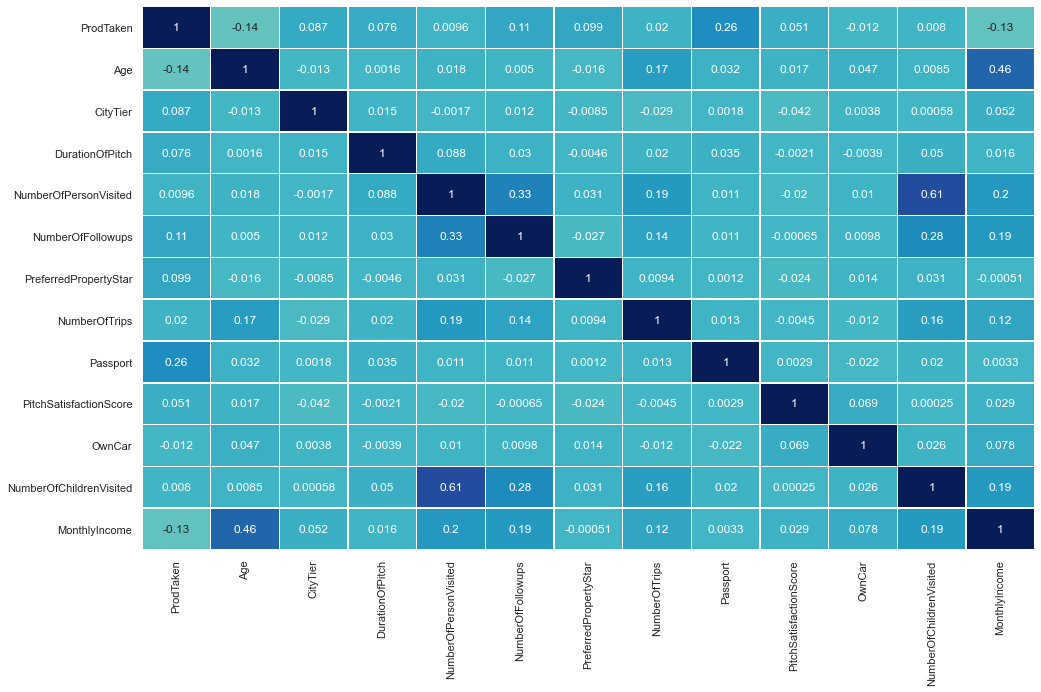

In [32]:
#Heatmap
sns.set(rc={'figure.figsize':(16,10)})
sns.heatmap(data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

## Creating categorical/dummy variables 

In [33]:
#Checking value counts of all object type columns
for i in list(data.columns[data.dtypes=='object']):   
    print(data[i].value_counts())
    print('-'*30)

Self Enquiry       3469
Company Invited    1419
Name: TypeofContact, dtype: int64
------------------------------
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
------------------------------
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
------------------------------
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
------------------------------
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
------------------------------
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64
------------------------------


In [34]:
#Creating dummy variables
data = pd.get_dummies(data, columns=['TypeofContact','Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation'])
data.head()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,...,ProductPitched_Super Deluxe,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,1,41.0,3,6.0,3,3.0,3.0,1.0,1,2,...,0,0,0,1,0,0,0,1,0,0
1,0,49.0,1,14.0,3,4.0,4.0,2.0,0,3,...,0,1,0,0,0,0,0,1,0,0
2,1,37.0,1,8.0,3,4.0,3.0,7.0,1,3,...,0,0,0,1,0,0,1,0,0,0
3,0,33.0,1,9.0,2,3.0,3.0,2.0,1,5,...,0,1,0,0,0,0,1,0,0,0
4,0,36.0,1,8.0,2,3.0,4.0,1.0,0,5,...,0,1,0,0,0,0,1,0,0,0


In [35]:
#data['CityTier'].nunique() # Number of unique values in CityTier column
#data['PreferredPropertyStar'].nunique() # Number of unique values in PreferredPropertyStar column

-Examining the correlation among the variables via heatmap

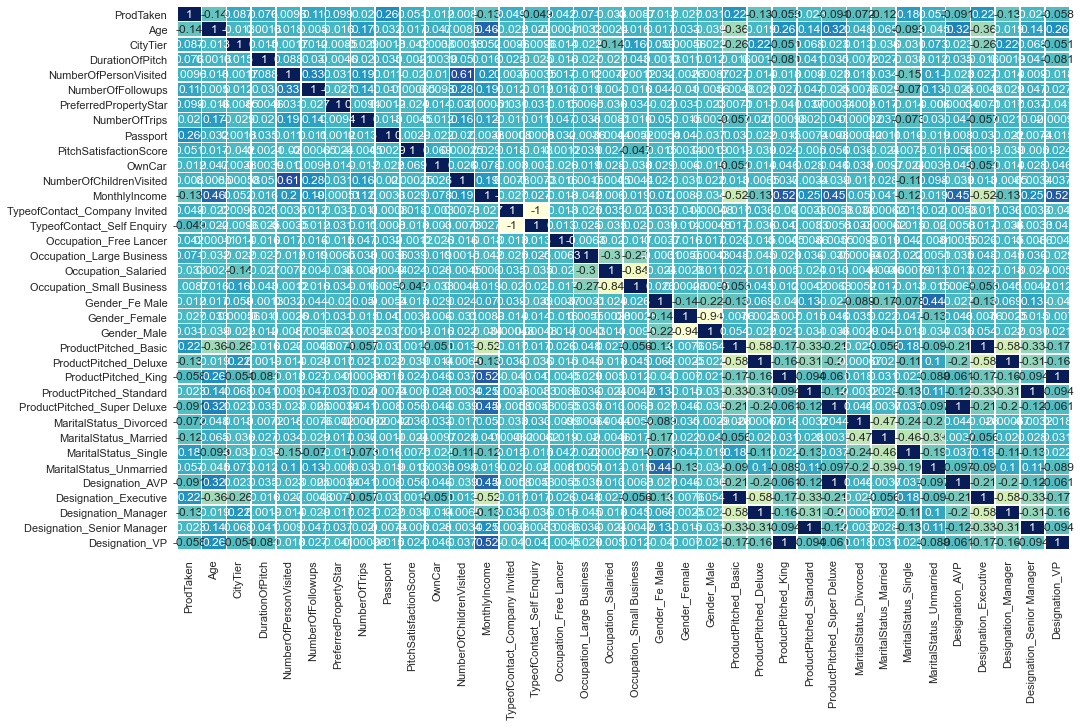

In [36]:
sns.set(rc={'figure.figsize':(16,10)})
sns.heatmap(data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

- It is clearly seen from the heatmap above that there is a 100% correlation between Designation and ProductPitched variables.
- One of the variable can be dropped from the dataset. 

In [37]:
#Dropping the column - ProductPitched
data.drop(columns=['ProductPitched_Deluxe', 'ProductPitched_King', 'ProductPitched_Standard', 'ProductPitched_Super Deluxe', 'ProductPitched_Basic'], inplace=True)

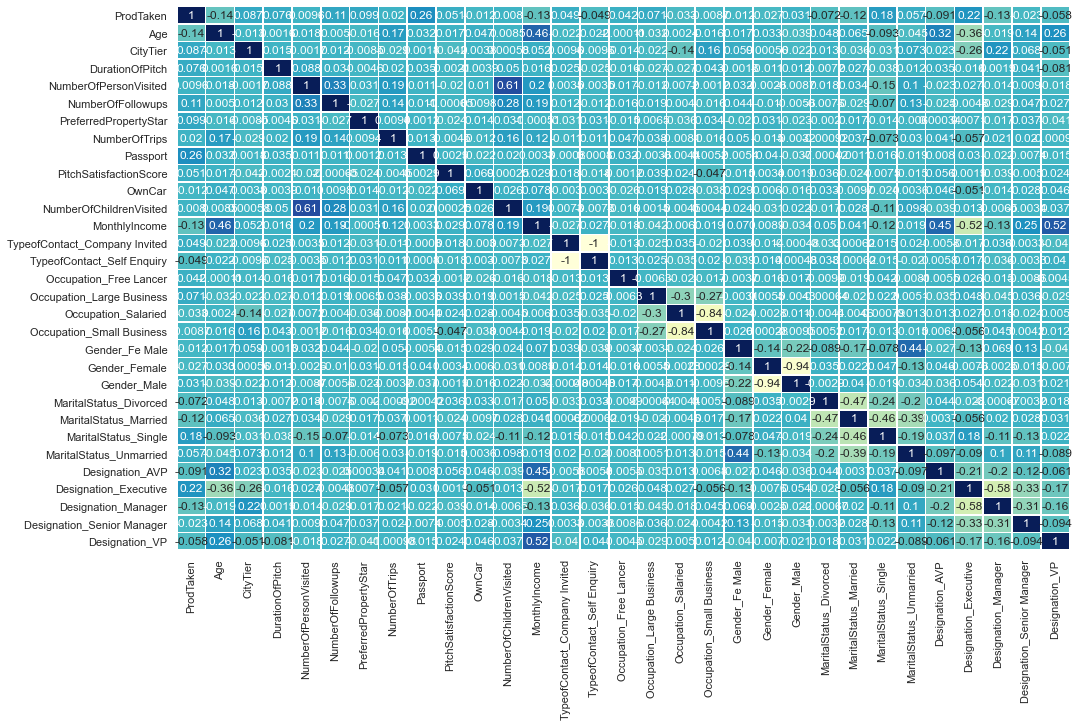

In [38]:
sns.set(rc={'figure.figsize':(16,10)})
sns.heatmap(data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

**Split the dataset**

In [39]:
# Separating features and the target column
X = data.drop('ProdTaken', axis=1)
y = data['ProdTaken']

In [40]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, shuffle=True)

In [41]:
X_train.shape, X_test.shape

((3421, 30), (1467, 30))

- We have 3421 observations in the train set and 1467 observations in the test set.

## <a id = "link6"></a>Building Models

- Different models fit on the train data and their performance might be different. 
- Some hyperparameters can be tunned to improve the performance of models.
- GridSearchCv for hyperparameter tuning and `r_2 score` can be used to optimize the model.
- R-square - `Coefficient of determination` is used to evaluate the performance of a regression model. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variables.
- The following is a function to get model scores, so that we don't have to use same codes repeatedly.

In [42]:
##  Function to calculate r2_score and RMSE on train and test data
def get_model_score(model, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_r2=metrics.r2_score(y_train,pred_train)
    test_r2=metrics.r2_score(y_test,pred_test)
    train_rmse=np.sqrt(metrics.mean_squared_error(y_train,pred_train))
    test_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_test))
    
    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print("R-sqaure on training set : ",metrics.r2_score(y_train,pred_train))
        print("R-square on test set : ",metrics.r2_score(y_test,pred_test))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train,pred_train)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test,pred_test)))
    
    # returning the list with train and test scores
    return score_list

### Decision Tree Model

In [43]:
dtree=DecisionTreeRegressor(random_state=1)
dtree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=1)

In [44]:
dtree_score=get_model_score(dtree)

R-sqaure on training set :  1.0
R-square on test set :  0.4032387425854548
RMSE on training set :  0.0
RMSE on test set :  0.3100234175468086


- Decision tree model with default parameters is overfitting the train data.
- Since R-square = 1.0, that's why there is no error on the training set (RMSE = 0)
- The following step would be to reduce the overfitting and improve the performance on the test data by tuning hyperparameters.

*Hyperparameter Tuning*

In [45]:
# Choose the type of classifier. 
dtree_tuned = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': list(np.arange(2,20)) + [None], 
              'min_samples_leaf': [1, 3, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10, 15] + [None],
              'min_impurity_decrease': [0.001, 0.01, 0.1, 0.0]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, random_state=1)

In [46]:
dtree_tuned_score=get_model_score(dtree_tuned)

R-sqaure on training set :  0.2922867462523532
R-square on test set :  0.22171072865467467
RMSE on training set :  0.3248733735985196
RMSE on test set :  0.3540500916217076


- The overfitting is reduced after hyperparameter tuning, but R-square value has decreased by approximately 18% (40%-22%).
- However, there is an increase in RMSE which reflects the improvement after tuning.

*Plotting the feature importance of each variable*

In [47]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                    Imp
Passport                       0.269126
Designation_Executive          0.228009
DurationOfPitch                0.127279
Age                            0.092764
CityTier                       0.089347
PreferredPropertyStar          0.041675
PitchSatisfactionScore         0.034910
NumberOfFollowups              0.029322
MaritalStatus_Married          0.027133
NumberOfTrips                  0.013525
MaritalStatus_Single           0.011978
Designation_Manager            0.010093
Occupation_Large Business      0.010052
Gender_Male                    0.008197
Occupation_Small Business      0.006590
TypeofContact_Self Enquiry     0.000000
NumberOfChildrenVisited        0.000000
Designation_Senior Manager     0.000000
NumberOfPersonVisited          0.000000
OwnCar                         0.000000
Designation_AVP                0.000000
MaritalStatus_Unmarried        0.000000
MaritalStatus_Divorced         0.000000
MonthlyIncome                  0.000000


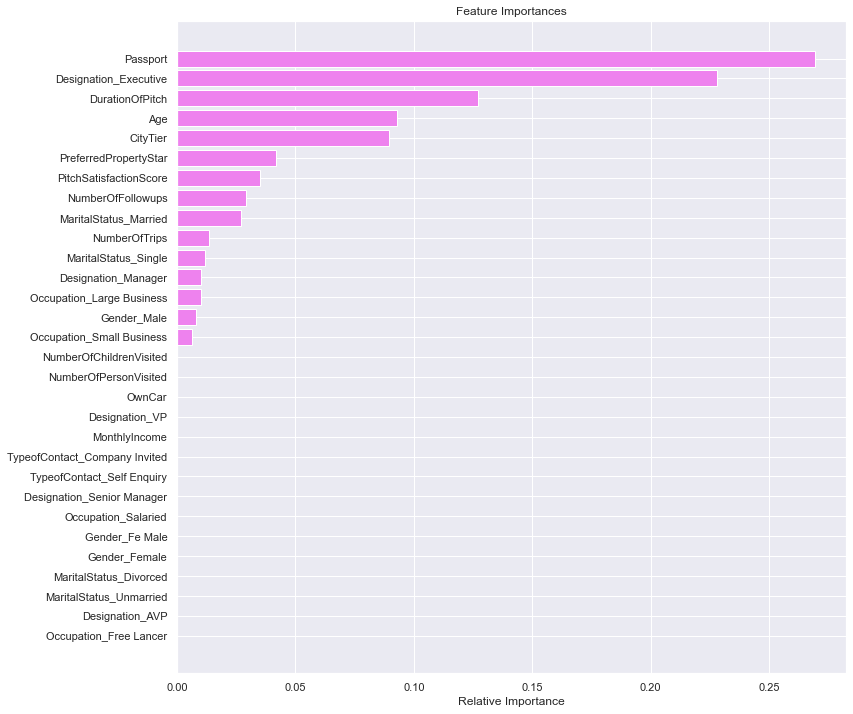

In [48]:
feature_names = X_train.columns
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- The most important feature is Passport which is followed by Designation-Executives and Duration of Pitch.
- It seems the new package requires international trip in which the Passport seems to be the most important variable in the dataset.

### Random Forest Model

In [49]:
rf_estimator=RandomForestRegressor(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestRegressor(random_state=1)

In [50]:
rf_estimator_score=get_model_score(rf_estimator)

R-sqaure on training set :  0.9412670785090252
R-square on test set :  0.6075816477023565
RMSE on training set :  0.09358931225629169
RMSE on test set :  0.25140206705263335


- Random Forest model gives better R-square (61%) on the test data yet it is overfitting the train data.
- The next step is to reduce this overfitting by hyperparameter tuning.

*Hyperparameter Tuning*

In [51]:
# Choose the type of classifier. 
rf_tuned = RandomForestRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {  
                'max_depth':[4, 6, 8, 10, None],
                'max_features': ['sqrt','log2',None],
                'n_estimators': [80, 90, 100, 110, 120]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_features=None, n_estimators=120, random_state=1)

In [52]:
rf_tuned_score=get_model_score(rf_tuned)

R-sqaure on training set :  0.9418767971789066
R-square on test set :  0.6095428478489164
RMSE on training set :  0.0931022598555872
RMSE on test set :  0.2507730606055433


- The results after the hyperparameter tuning do not give any significant changes on the performance measures. 

In [53]:
# importance of features in the random forest tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                    Imp
Age                            0.122938
MonthlyIncome                  0.122501
DurationOfPitch                0.122499
Passport                       0.080834
Designation_Executive          0.074443
PitchSatisfactionScore         0.057572
NumberOfTrips                  0.057295
NumberOfFollowups              0.051224
CityTier                       0.044415
PreferredPropertyStar          0.039475
MaritalStatus_Single           0.021308
NumberOfChildrenVisited        0.020226
NumberOfPersonVisited          0.017229
MaritalStatus_Married          0.015524
Occupation_Large Business      0.015026
MaritalStatus_Unmarried        0.014272
OwnCar                         0.013859
Occupation_Small Business      0.013761
Gender_Female                  0.012891
TypeofContact_Company Invited  0.012276
Gender_Male                    0.011933
Designation_Manager            0.011633
Occupation_Salaried            0.011112
TypeofContact_Self Enquiry     0.011108


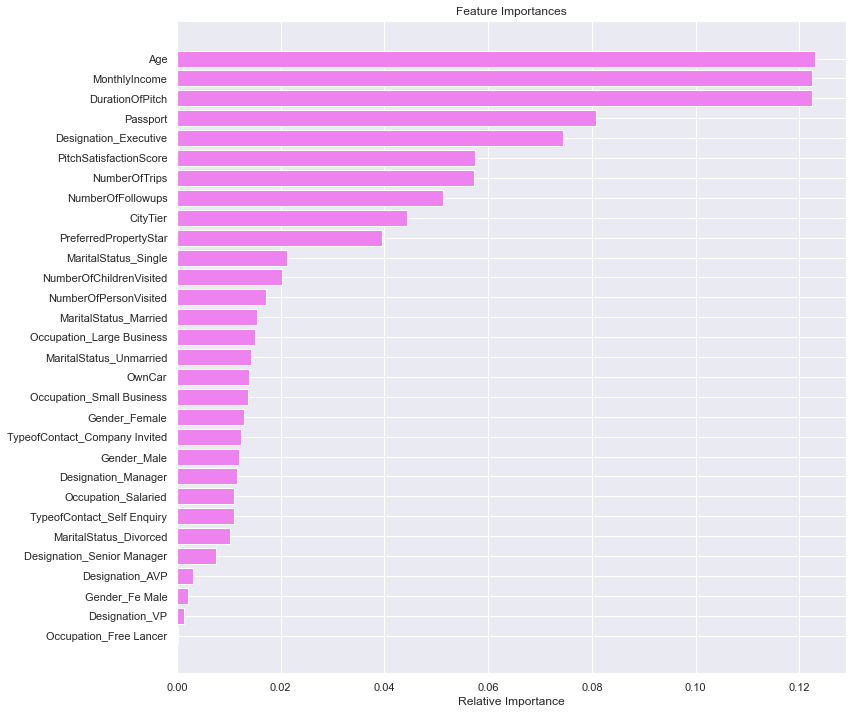

In [54]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- According to Random Forest Model, the features of Age, Monthly Income, and Duration of Pitch are the most important features,  in order. Passport and Designation_Executives are forth and fifth important ones, respectively.

## <a id = "link6"></a>Boosting Models

### AdaBoost Regressor

In [55]:
ab_regressor=AdaBoostRegressor(random_state=1)
ab_regressor.fit(X_train,y_train)

AdaBoostRegressor(random_state=1)

In [56]:
ab_regressor_score=get_model_score(ab_regressor)

R-sqaure on training set :  0.17319185419980587
R-square on test set :  0.14595223652622513
RMSE on training set :  0.35114608212697723
RMSE on test set :  0.3708815839699203


- AdaBoost is generalizing well but its performance is poor based on the R-square score on the test set comparing to decision tree and random forest model.

**Hyperparameter Tuning**

In [57]:
# Choose the type of classifier. 
ab_tuned = AdaBoostRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(10,100,10), 
              'learning_rate': [1, 0.1, 0.5, 0.01],
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(ab_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
ab_tuned.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.01, n_estimators=80, random_state=1)

In [58]:
ab_tuned_score=get_model_score(ab_tuned)

R-sqaure on training set :  0.20926171216516465
R-square on test set :  0.1605527876194398
RMSE on training set :  0.3434012232416769
RMSE on test set :  0.36769767590645563


- There is an improvement on R-square after hyperparameter tuning by 1.5% which is not significant.
- RMSE gives no significant change either.

In [59]:
# importance of features in the tree building

print(pd.DataFrame(ab_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                    Imp
Passport                       0.377371
Designation_Executive          0.265722
Age                            0.098129
CityTier                       0.055882
DurationOfPitch                0.046855
NumberOfFollowups              0.044777
PreferredPropertyStar          0.029673
MonthlyIncome                  0.023714
MaritalStatus_Single           0.022005
MaritalStatus_Married          0.012369
PitchSatisfactionScore         0.009567
Occupation_Large Business      0.004911
Occupation_Small Business      0.002216
Designation_Manager            0.001513
Gender_Female                  0.001167
Occupation_Salaried            0.000948
NumberOfPersonVisited          0.000794
NumberOfTrips                  0.000648
MaritalStatus_Unmarried        0.000595
Gender_Male                    0.000422
OwnCar                         0.000397
NumberOfChildrenVisited        0.000324
TypeofContact_Company Invited  0.000000
Designation_AVP                0.000000


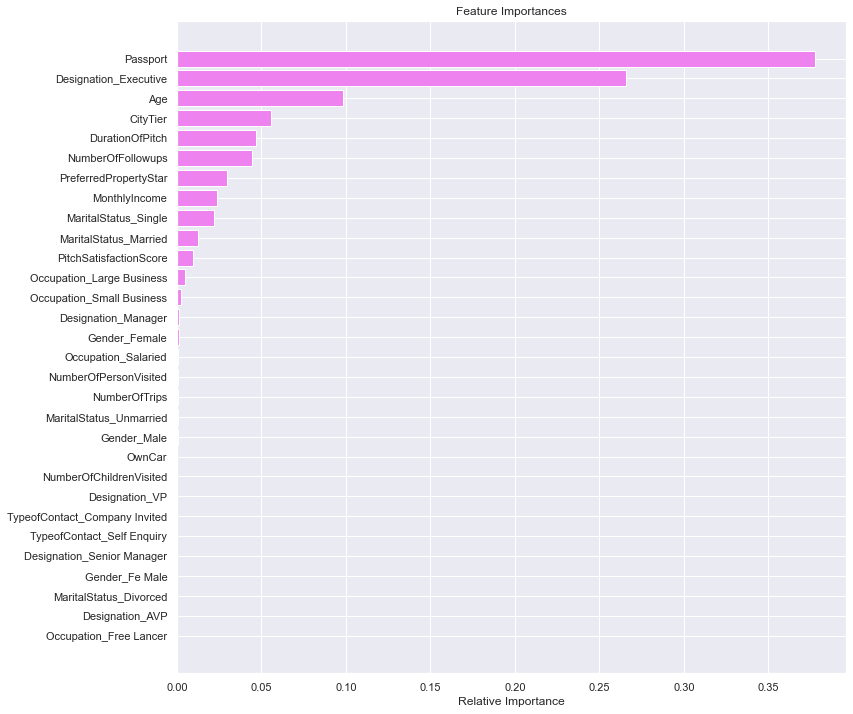

In [60]:
feature_names = X_train.columns
importances = ab_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- As it is in Tree Model, the most important feature in Adaboost Model is Passport which is followed by Designation-Executives. The third important one is Age feature.

### Gradient Boosting Regressor

In [61]:
gb_estimator=GradientBoostingRegressor(random_state=1)
gb_estimator.fit(X_train,y_train)

GradientBoostingRegressor(random_state=1)

In [62]:
gb_estimator_score=get_model_score(gb_estimator)

R-sqaure on training set :  0.4198239277165291
R-square on test set :  0.31870128966947486
RMSE on training set :  0.29414763480104944
RMSE on test set :  0.33125540452713625


- Gradient boosting is generalizing well but R-square value is not good enough.

**Hyperparameter Tuning**

In [63]:
# Choose the type of classifier. 
gb_tuned = GradientBoostingRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50,200,25), 
              'subsample':[0.7,0.8,0.9,1],
              'max_features':[0.7,0.8,0.9,1],
              'max_depth':[3,5,7,10]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gb_tuned.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=10, max_features=0.9, n_estimators=175,
                          random_state=1, subsample=0.8)

In [64]:
gb_tuned_score=get_model_score(gb_tuned)

R-sqaure on training set :  0.9999333051452536
R-square on test set :  0.6971799307431867
RMSE on training set :  0.003153781631296634
RMSE on test set :  0.22084446367121396


- We can see that the model improves significantly in terms of R-square and RMSE.
- The R-square value increases by approx 37.8% (69.7% - 31.9%) on the test data.
- RMSE decreases by 11 for the test data.

In [65]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(gb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                    Imp
DurationOfPitch                0.129844
Age                            0.128119
MonthlyIncome                  0.124487
Passport                       0.070445
Designation_Executive          0.069905
PitchSatisfactionScore         0.063838
NumberOfTrips                  0.058556
NumberOfFollowups              0.051587
CityTier                       0.046630
PreferredPropertyStar          0.039974
MaritalStatus_Single           0.019441
NumberOfChildrenVisited        0.019413
Occupation_Large Business      0.017521
Occupation_Small Business      0.014873
MaritalStatus_Married          0.013515
Designation_Manager            0.012849
TypeofContact_Company Invited  0.012799
NumberOfPersonVisited          0.012487
Gender_Male                    0.012347
Gender_Female                  0.012069
MaritalStatus_Unmarried        0.012014
OwnCar                         0.011422
TypeofContact_Self Enquiry     0.011376
Occupation_Salaried            0.010973


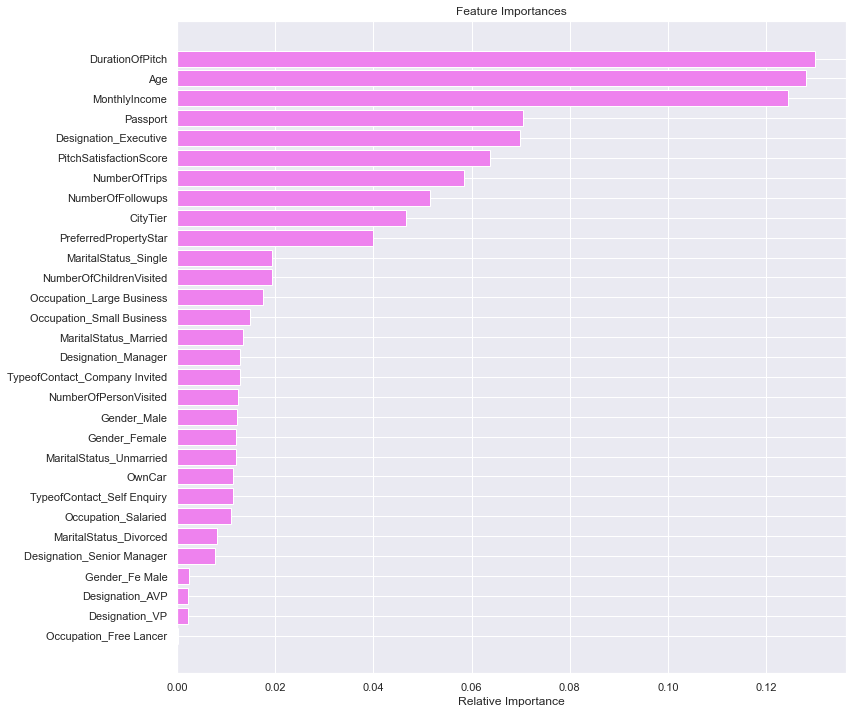

In [66]:
feature_names = X_train.columns
importances = gb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- The first three important features for Gradient Boosting Model is Duration of Pitch, Age and Monthly Income, in order.

### XGBoost Regressor

In [68]:
xgb_estimator=XGBRegressor(random_state=1)
xgb_estimator.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [69]:
xgb_estimator_score=get_model_score(xgb_estimator)

R-sqaure on training set :  0.9526179596356199
R-square on test set :  0.5962433143030603
RMSE on training set :  0.08406057047849722
RMSE on test set :  0.2550081453021656


- XGBoost Model with default parameters gives better results than gradient boosting model regarding both R-square and RMSE values.

**Hyperparameter Tuning**

In [70]:
# Choose the type of classifier. 
xgb_tuned = XGBRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': [75,100,125,150], 
              'subsample':[0.7, 0.8, 0.9, 1],
              'gamma':[0, 1, 3, 5],
              'colsample_bytree':[0.7, 0.8, 0.9, 1],
              'colsample_bylevel':[0.7, 0.8, 0.9, 1]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
xgb_tuned.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=150, n_jobs=4, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [71]:
xgb_tuned_score=get_model_score(xgb_tuned)

R-sqaure on training set :  0.977016173354719
R-square on test set :  0.6210549169863426
RMSE on training set :  0.0585459183217342
RMSE on test set :  0.24704856031016262


- There is an almost 2% improvement on the R-square value after tuning.
- RMSE decreases by 1%.

In [72]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(xgb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                    Imp
Designation_Executive          0.111320
Passport                       0.086251
MaritalStatus_Single           0.081994
MaritalStatus_Unmarried        0.060244
Designation_Manager            0.044842
TypeofContact_Self Enquiry     0.039964
Gender_Male                    0.038929
Occupation_Salaried            0.032832
Occupation_Small Business      0.031792
DurationOfPitch                0.031668
Occupation_Large Business      0.031228
Designation_Senior Manager     0.029362
TypeofContact_Company Invited  0.029159
PreferredPropertyStar          0.028854
CityTier                       0.028533
NumberOfTrips                  0.027926
Gender_Fe Male                 0.027476
PitchSatisfactionScore         0.026673
NumberOfFollowups              0.025967
Designation_VP                 0.025418
Gender_Female                  0.025029
Designation_AVP                0.024500
Age                            0.022210
MonthlyIncome                  0.021533


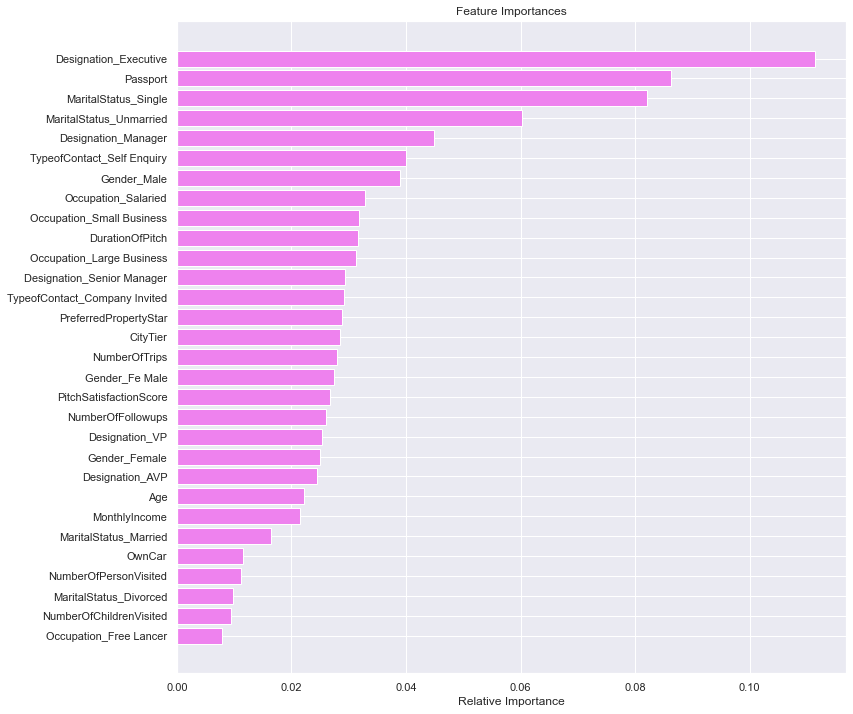

In [73]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- In XGBoosting model, the most important feature is Designation_Executive followed by Passport and Marital Status_Single.

## <a id = "link7"></a>Stacking Model

*Now, let's build a stacking model with the tuned models - decision tree, random forest and gradient boosting, then use XGBoost to get the final prediction.*

In [74]:
estimators=[('Decision Tree', dtree_tuned),('Random Forest', rf_tuned),
           ('Gradient Boosting', gb_tuned)]
final_estimator=XGBRegressor(random_state=1)

In [75]:
stacking_estimator=StackingRegressor(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

StackingRegressor(cv=5,
                  estimators=[('Decision Tree',
                               DecisionTreeRegressor(max_depth=5,
                                                     min_samples_leaf=10,
                                                     random_state=1)),
                              ('Random Forest',
                               RandomForestRegressor(max_features=None,
                                                     n_estimators=120,
                                                     random_state=1)),
                              ('Gradient Boosting',
                               GradientBoostingRegressor(max_depth=10,
                                                         max_features=0.9,
                                                         n_estimators=175,
                                                         random_state=1,
                                                         subsample=0.8))],
                  final_estimat...

In [76]:
stacking_estimator_score=get_model_score(stacking_estimator)

R-sqaure on training set :  0.9574022933641041
R-square on test set :  0.6067039615615198
RMSE on training set :  0.07970371474392976
RMSE on test set :  0.2516830539998995


- Stacking Estimator model gives an R-square of 60.7% and RMSE of 25 on the test set.

## Comparing all models

In [77]:
# defining list of models
models = [dtree, dtree_tuned, rf_estimator, rf_tuned, ab_regressor, ab_tuned, gb_estimator, gb_tuned, xgb_estimator,
         xgb_tuned, stacking_estimator]

# defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train= []
rmse_test= []

# looping through all the models to get the rmse and r2 scores
for model in models:
    # accuracy score
    j = get_model_score(model,False)
    r2_train.append(j[0])
    r2_test.append(j[1])
    rmse_train.append(j[2])
    rmse_test.append(j[3])

In [80]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest','Tuned Random Forest',
                                          'AdaBoost Regressor', 'Tuned AdaBoost Regressor',
                                          'Gradient Boosting Regressor', 'Tuned Gradient Boosting Regressor',
                                          'XGBoost Regressor',  'Tuned XGBoost Regressor','Stacking Regressor'], 
                                          'Train_r2': r2_train,'Test_r2': r2_test,
                                          'Train_RMSE':rmse_train,'Test_RMSE':rmse_test}) 
comparison_frame

,Model,Train_r2,Test_r2,Train_RMSE,Test_RMSE
0,Decision Tree,1.000000,0.403239,0.000000,0.310023
1,Tuned Decision Tree,0.292287,0.221711,0.324873,0.354050
2,Random Forest,0.941267,0.607582,0.093589,0.251402
3,Tuned Random Forest,0.941877,0.609543,0.093102,0.250773
4,AdaBoost Regressor,0.173192,0.145952,0.351146,0.370882
5,Tuned AdaBoost Regressor,0.209262,0.160553,0.343401,0.367698
6,Gradient Boosting Regressor,0.419824,0.318701,0.294148,0.331255
7,Tuned Gradient Boosting Regressor,0.999933,0.697180,0.003154,0.220844
8,XGBoost Regressor,0.952618,0.596243,0.084061,0.255008
9,Tuned XGBoost Regressor,0.977016,0.621055,0.058546,0.247049


- It is found that Tuned Gradient Boosting is the best model in our case. It has the highest R-square value of 69.7% and the lowest RMSE of approx 22.1 on the test data.
- The second best model is Tuned XGBoost Model followed by Random Forest and Stacking Regressor. 

## <a id = "link8"></a> Business Recommendations

- We can use this predictive model to help marketing costs of the tourism company "Visit with us" reduced. 
- The ability to predict which customer is more likely to purchase the newly introduced Wellness Tourism Package can allow the company to oversee their marketing strategies in a more efficient and cost-effective manner.
- Among many other variables, duration of pitch, pitch satisfaction scoreand number of follow ups variables are important factors affecting the customers' decision on purchasing the product. Therefore, marketing team's communication skills should be excellent. Hiring to marketing department should be accordingly.
- Having a passport seems to be important factor as well. Targeted customers should be passport holders.
- The company can provide passport services to the potential customers. It is basically taken care of the company. It would create additional customers as well.

- Note: Customer's age and monthly income are the second and third important variables in the model, respectively. Further study  can be done on these data groups to determine the specific age and income groups (by creating dummies) interested in the product. 